<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D0%BF%D1%80%D0%B8%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример на реальных данных

In [2]:
pip install dtreeviz 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 3.7 MB/s eta 0:00:00


In [3]:
# Экспорт необходимых для исследования библиотек
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import dtreeviz 

In [4]:
# Загрузка данных и првоерка их целостности
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
display(df.head(3), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


None

In [5]:
df1 = df.copy() # произведём копирование датасета для защиты от случайного изменения

In [6]:
df1.drop('gameId', axis=1, inplace=True)
df1.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [7]:

# произведём резервное копирование очищенного датасета
df_big = df.copy()

In [8]:
# выберем данные для дальнейшего исследования и создадим новый выборочный датасет
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28


In [9]:
# удалим признаки с высокой мультиколлинеарностью.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

<AxesSubplot:>

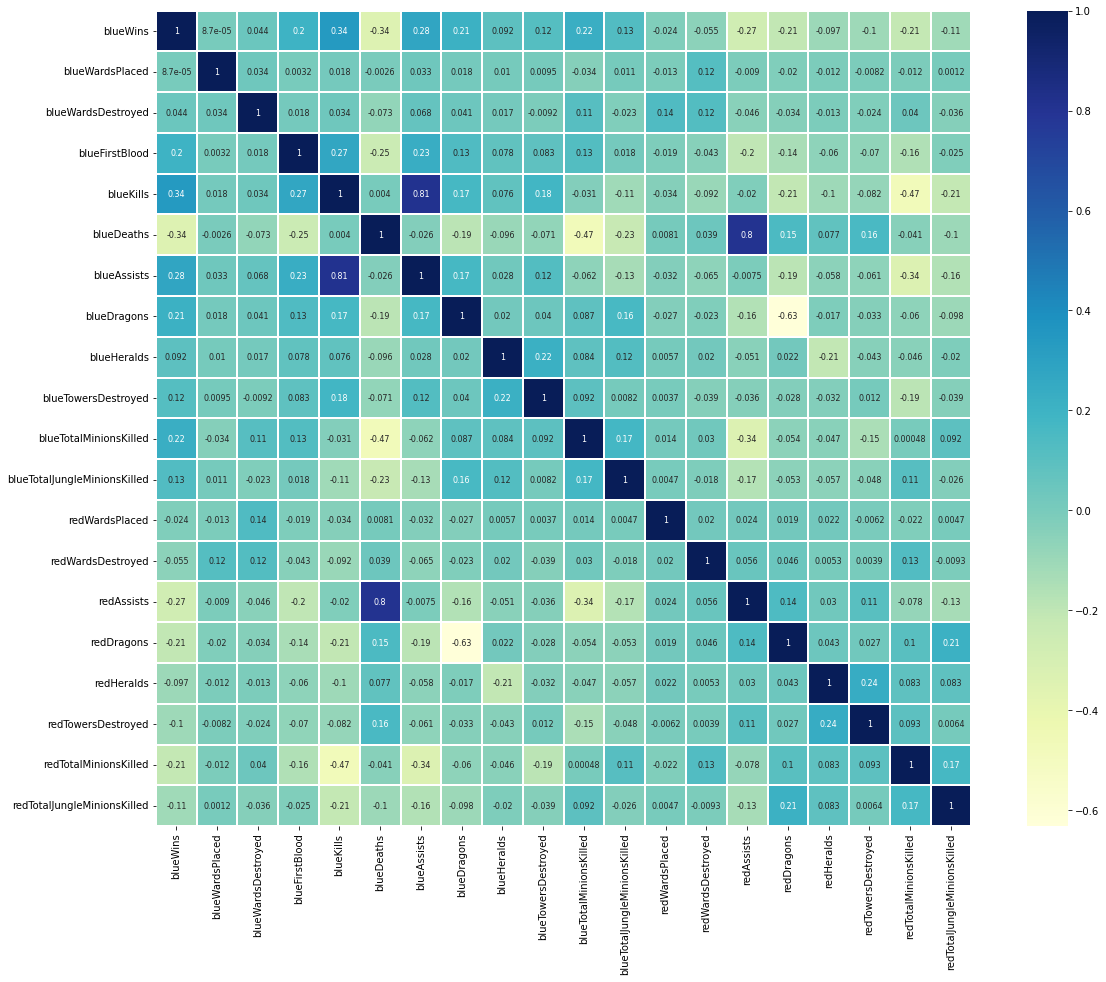

In [30]:
plt.figure(figsize = (20,15))

sns.heatmap(df_select.corr(),annot = True, vmax=1, square=True, cmap="YlGnBu", 
        linewidths=0.1, annot_kws={"size":8})

In [10]:
# функция оценки модели

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 

        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
   
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [11]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_big, 'blueWins')

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7182    0.6417    0.6778      4203
           1     0.6756    0.7477    0.7098      4194

    accuracy                         0.6947      8397
   macro avg     0.6969    0.6947    0.6938      8397
weighted avg     0.6969    0.6947    0.6938      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7241    0.6367    0.6776       746
           1     0.6719    0.7541    0.7106       736

    accuracy                         0.6950      1482
   macro avg     0.6980    0.6954    0.6941      1482
weighted avg     0.6982    0.6950    0.6940      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


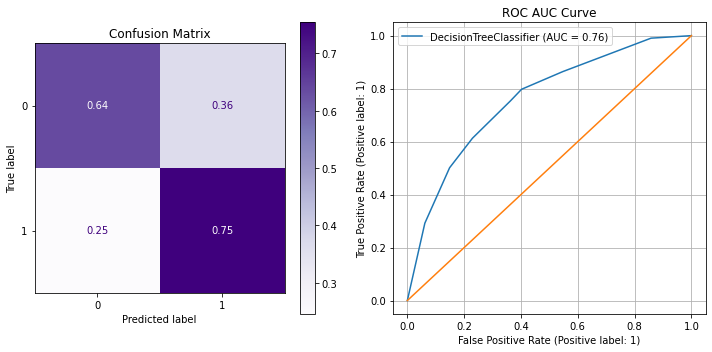

In [27]:
tree_select = fit_eval(DecisionTreeClassifier(max_depth=3, random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7128    0.7583    0.7348      4203
           1     0.7412    0.6938    0.7167      4194

    accuracy                         0.7261      8397
   macro avg     0.7270    0.7261    0.7258      8397
weighted avg     0.7270    0.7261    0.7258      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7054    0.7641    0.7336       746
           1     0.7389    0.6766    0.7064       736

    accuracy                         0.7206      1482
   macro avg     0.7222    0.7204    0.7200      1482
weighted avg     0.7220    0.7206    0.7201      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


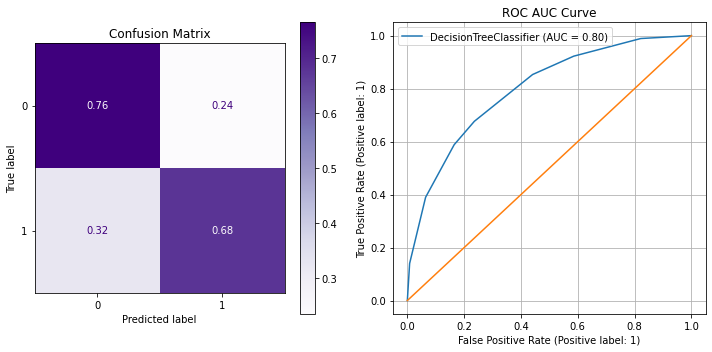

In [28]:
# применим алгоритм на полном наборе данных 
tree_big=fit_eval(DecisionTreeClassifier(max_depth=3, random_state=42), X_train_big, y_train_big, \
                                                  X_test_big, y_test_big)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


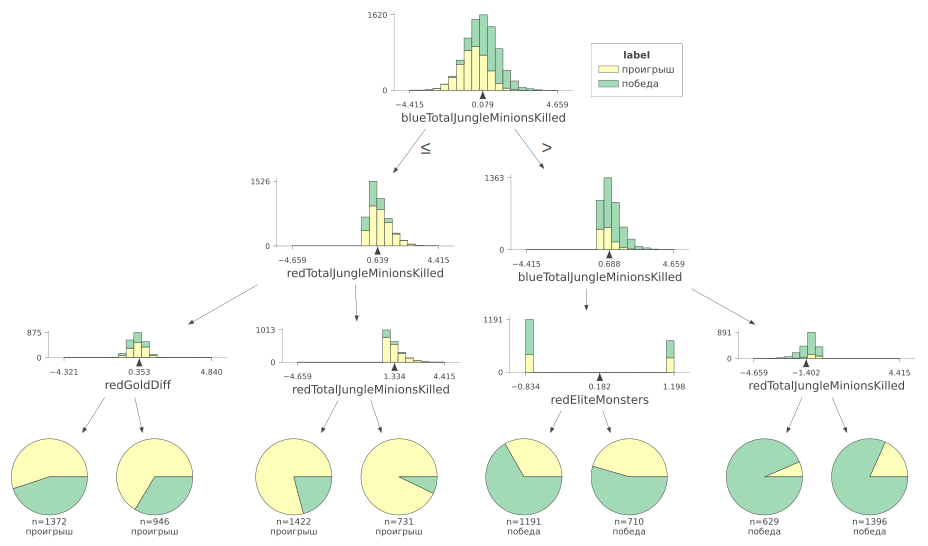

In [29]:
viz = dtreeviz.model(tree_big, 
              X_train_big,  
              y_train_big,
               target_name='label',
               feature_names=df.columns.to_list(), 
               class_names=["проигрыш", "победа"],
               )

#viz.save("dtreeviz.svg")

viz.view(scale=1.3)

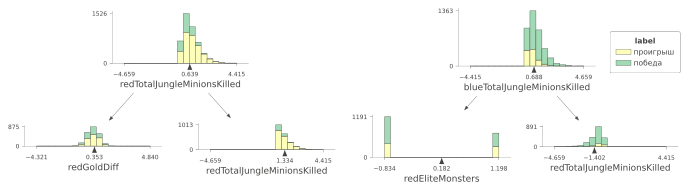

In [31]:
viz.view(depth_range_to_display=(1, 2)) # root is level 0

In [71]:
x=df_big.iloc[400]

In [67]:
df_select.iloc[400]

blueWins                          1
blueWardsPlaced                  17
blueWardsDestroyed                3
blueFirstBlood                    0
blueKills                        10
blueDeaths                       10
blueAssists                      10
blueDragons                       0
blueHeralds                       0
blueTowersDestroyed               0
blueTotalMinionsKilled          219
blueTotalJungleMinionsKilled     38
redWardsPlaced                   13
redWardsDestroyed                 1
redAssists                       10
redDragons                        0
redHeralds                        1
redTowersDestroyed                1
redTotalMinionsKilled           208
redTotalJungleMinionsKilled      31
Name: 400, dtype: int64

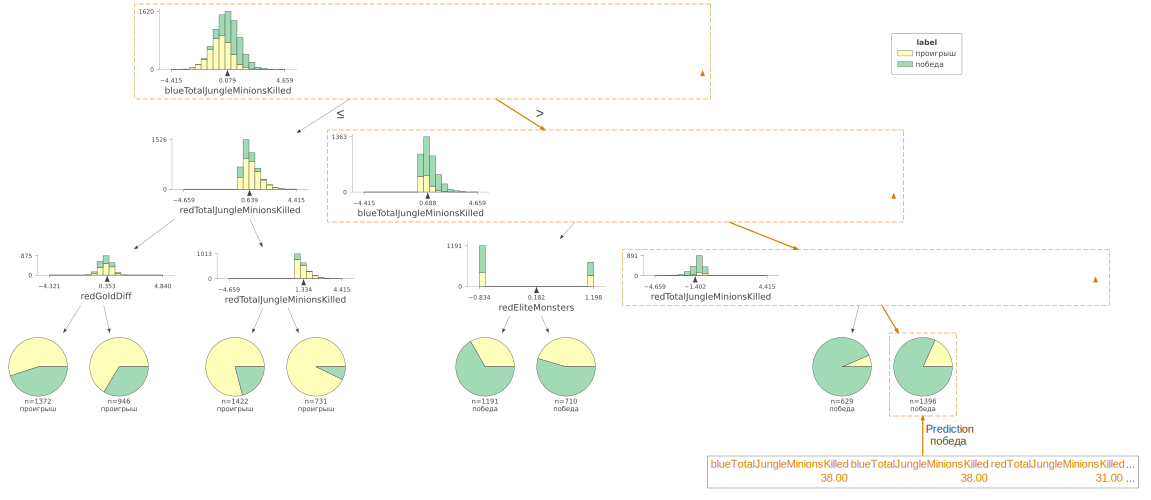

In [72]:
viz.view(x=x)

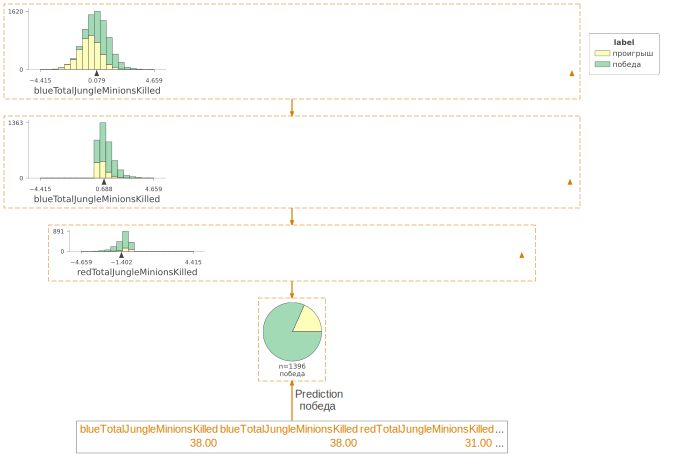

In [73]:
viz.view(x=x, show_just_path=True)

In [53]:
print(viz.explain_prediction_path(x))

0.69 <= blueTotalJungleMinionsKilled 
-1.4 <= redTotalJungleMinionsKilled 



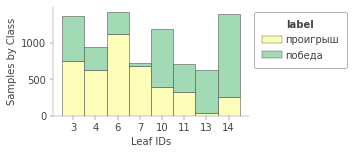

In [56]:
viz.ctree_leaf_distributions(figsize=(3.5,2))

<AxesSubplot:>

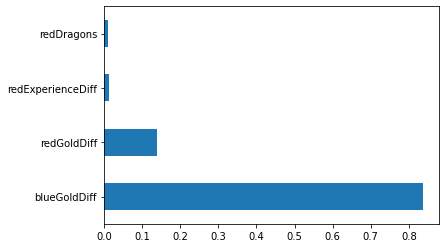

In [102]:
feat_importances = pd.Series(tree_big.feature_importances_, index=df1.columns)
feat_importances.nlargest(4).plot(kind='barh')

# Задание
на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый 
- использовать на выбор любой метод линейной регрессии 
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний